# **P4DS Final Project: An Analysis On Global Warming**
Huy G. Tong $^{1 *}$ \
$^{1}$ *Faculty of Information Technology, VNUHCM - University of Science, Vietnam*\
$^{*}$ *Student ID: 21127307*


#### **ABSTRACT**
To be written later.

#### **1. INTRODUCTION**

To be written later.

#### **2. METHOD**

In this section, I will describe in detail the steps used to perform the analysis on the dataset. I will also give a brief description of the data used in this project, as well as include the codes to help derive insightful information.

First, let us import the necessary packages, be sure to run the bellow cell at least once when executing this Notebook.


In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt

#### **2.1 Data**

In [36]:
globtemp = pd.read_csv("data/GlobalTemperatures.csv")
country_co2_emission = pd.read_csv("data/co2_emissions_kt_by_country.csv")

#### **2.2 Preprocessing**

In [51]:
globtemp = globtemp.dropna(axis=0)
country_co2_emission = country_co2_emission.dropna(axis=0)

In [57]:
globtemp_annual_mean = globtemp.copy()
globtemp_annual_mean["dt"] = pd.to_datetime(globtemp_annual_mean["dt"], format="%Y-%m-%d").dt.year
globtemp_annual_mean = globtemp_annual_mean.groupby("dt").mean().reset_index()
globtemp_annual_mean.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417


In [58]:
country_co2_emission["year"] = pd.to_datetime(country_co2_emission["year"], format="%Y").dt.year

In [63]:
globtemp_year_min = globtemp_annual_mean["dt"].min()
globtemp_year_max = globtemp_annual_mean["dt"].max()

co2_emission_year_min = country_co2_emission["year"].min()
co2_emission_year_max = country_co2_emission["year"].max()

start_year = max(globtemp_year_min, co2_emission_year_min)
end_year = min(globtemp_year_max, co2_emission_year_max)

print(f"-- Begin analysis from year {start_year}")
print(f"-- End analysis at year {end_year}")
print(f"-- Total of {end_year - start_year} years")

-- Begin analysis from year 1960
-- End analysis at year 2015
-- Total of 55 years


#### **2.3 Analysis**

note questions:
- how has the global temperature changed throughout the years?
- temp and gas: what is the relation?

In [76]:
x = globtemp_annual_mean.loc[globtemp_annual_mean["dt"] >= start_year]
x = x.loc[x["dt"] <= end_year]

y = country_co2_emission.loc[country_co2_emission["year"] >= start_year]
y = y.loc[y["year"] <= end_year]
y = y.groupby("year").mean().reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8940\1188872571.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = y.groupby("year").mean().reset_index()


((56, 2), (56, 9))

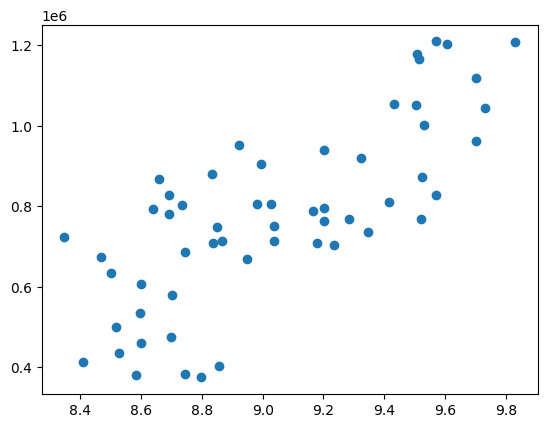

In [77]:
plt.scatter(x["LandAverageTemperature"], y["value"])

#### **3. CONCLUSION**

#### **REFERENCES**